# SciPy ile Optimizasyon

👋 [SciPy](https://scipy.org/) (`Scientific Python`) ile tanışın, güçlü bir kütüphane:
- NumPy tabanlıdır
- Python'da matematiksel işlemler için kullanılır

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## (1) Yerel Optimizasyon

* Önceki alıştırmamızda, hedefler ile tahminler arasındaki (ortalama) karesel hataları **minimize etmenin** önemli olduğunu ve bunun için bir fonksiyonun minimumunu bulmamız gerektiğini gördük.

* Bu problem için iki yaklaşımımız var:
    1. `kapalı-form çözümler` (örneğin, matrisin tersini almak)
    2. `yinelemeli yaklaşımlar` (örneğin, gradyan inişi)

👉 [`scipy.optimize`](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) modülünü kullanarak bir fonksiyonun **yerel** minimumunu nasıl bulacağımızı keşfedelim _(birkaç satır kod ile)_

In [2]:
# Import optimize
from scipy import optimize

### (1.1) 1 Boyutlu Fonksiyon

Aşağıdaki fonksiyonu ele alalım: $ f : x \rightarrow x^2 - 20 \cdot  cos(x) $

In [4]:
def f(x):
    return x**2 - 20 * np.cos(x)

❓ Bu fonksiyonu -10 ile +10 arasında *x-ekseni* ile birlikte çiziniz ❓

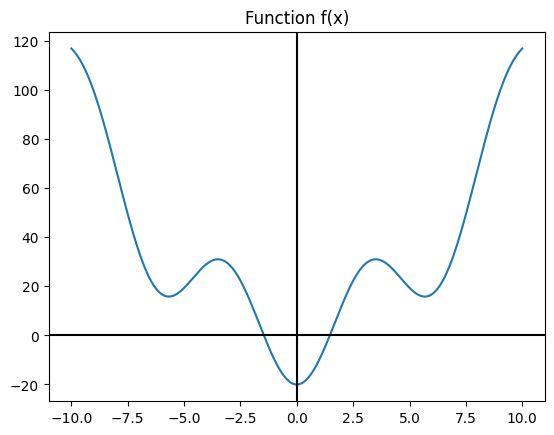

In [5]:
# YOUR CODE HERE
x = np.linspace(-10, 10, 400)
plt.plot(x, f(x))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Function f(x)")
plt.show()

❓ `x0` başlangıç noktasından başlayarak `optimize.minimize()` ile $f$ fonksiyonunun **yerel minimumunu** bulmaya çalışın ❓

In [10]:
# YOUR CODE HERE
x0 = 8  # başlangıç noktası

result = optimize.minimize(f, x0)

result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 15.791736781359308
        x: [ 5.679e+00]
      nit: 8
      jac: [ 0.000e+00]
 hess_inv: [[ 5.416e-02]]
     nfev: 20
     njev: 10

In [9]:
print("Minimum x:", result.x)
print("Minimum value:", result.fun)
print("Iterations:", result.nit)
print("Success:", result.success)

Minimum x: [1.68131113e-09]
Minimum value: -20.0
Iterations: 5
Success: True


❓ Belirli bir $ x_0 $ noktasından başlayarak, `optimize.minimize()`:
* `x` değişkeninde gösterilen değere yakın bir **$f$ minimumu** buldu,
* ve `scipy`'nin fonksiyonun minimumuna ulaşması için geçen iterasyon sayısını `nit` olarak verdi.

Ne sonuç çıkarabilirsiniz? ❓

❓ `x0` değerini değiştirip ne olduğunu gözlemleyin ❓

<details>
    <summary><i>Açıklamalar</i></summary>
    
💡 <code>nit</code> iterasyonundan sonra, <code>scipy.minimize()</code> fonksiyonunun algoritması, <code>x0</code> başlangıç değeri küresel minimuma (grafikte 0) yeterince yakın değilse, bir yerel minimumda <code>x</code> değerinde takılır. Bulunan yerel minimumun değeri <code>fun</code> ile okunabilir - bizim örneğimizde 15.79.
    
💡 Matematikte, bu fonksiyonun [konveks](https://en.wikipedia.org/wiki/Convex_function) olmadığını söyleriz. Eğer fonksiyon `konveks` olsaydı, herhangi bir yerel minimum aslında küresel minimum olurdu! Aslında, Makine Öğrenmesi konveks fonksiyonları sever ve bu tür problemler yinelemeli süreçlerle (ör. gradyan inişi) çok kolay çözülür!
</details>

### (1.2)  2 Boyutlu Fonksiyon

Önceki alıştırmada gördüğümüz gibi, birden fazla parametreli bir fonksiyonun minimumunu bulmak hızla karmaşık hale gelir. Şimdi çok değişkenli bir fonksiyon ile deneyelim: $$ g : (x,y) \rightarrow -(y + 47) \cdot   sin(\sqrt{\lvert\frac{x}{2} + (y  + 47) \rvert} ) \\
        -x \cdot sin(\sqrt{\lvert x - (y  + 47)\rvert}) $$

In [11]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47)))) \
        -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

❓ Aşağıdaki hücreyi çalıştırarak `g` fonksiyonunu 3B olarak görselleştirin ❓

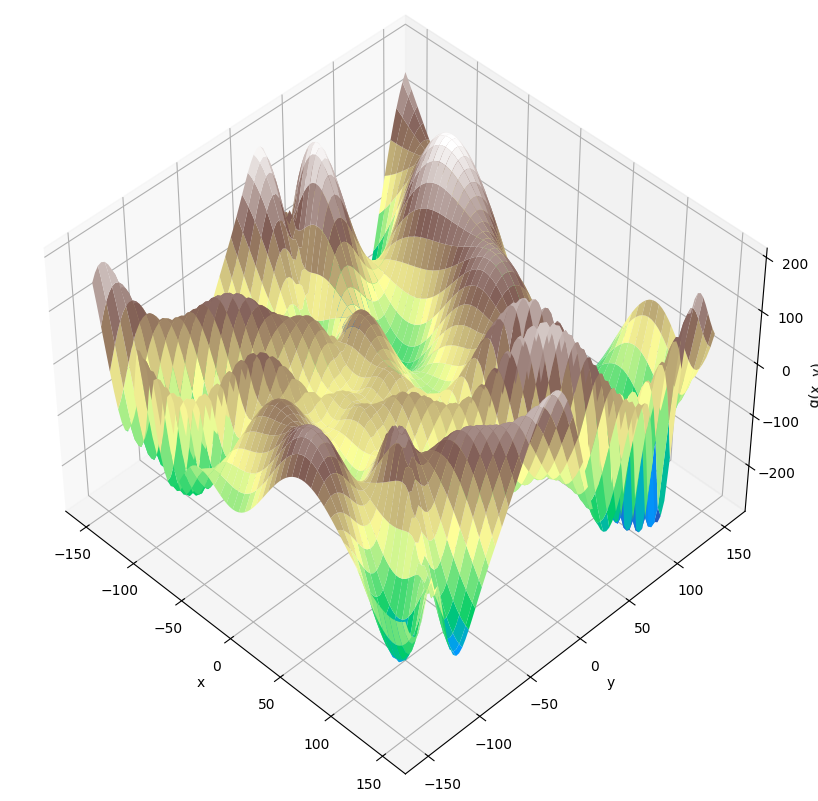

In [12]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓ Bir başlangıç noktası `X0` tanımlayın ❓

In [14]:
# YOUR CODE HERE
X0 = np.array([0, 0])

❓ `optimize.minimize()` kullanarak bir `minimum` bulun ❓

In [15]:
#### Compute and store the x,y coordinates of the minimum inside a `minimum` variable
result = optimize.minimize(g, X0)
minimum = result.x
minimum

array([ 8.45692736, 15.65092357])

❓ Bu bulduğunuz değer mutlak minimum gibi görünüyor mu? Aşağıda kontrol edin ❓

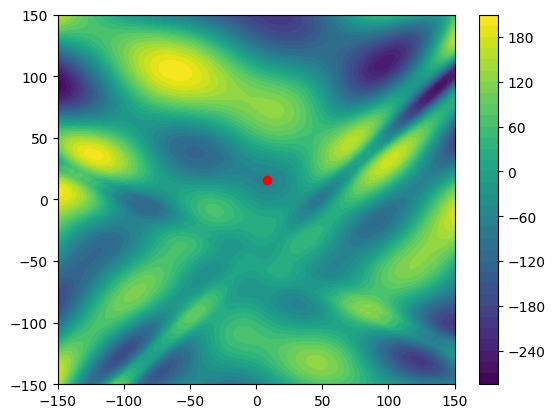

In [16]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum[0], minimum[1], c='r')

❗️ Muhtemelen sadece $X0$ başlangıç noktasına göre **yerel** bir minimum buldunuz.

❓ **Küresel** minimumu bulma şansınızı artıracak bir yöntem düşünebilir misiniz? ❓

> CEVABINIZI BURAYA YAZIN
Birden fazla rastgele başlangıç noktası (X0) ile minimize çalıştırarak, her iterasyonda bulunan minimum değeri saklayabiliriz. Bu sayede küresel minimumu bulma ihtimali artar. Ayrıca scipy.optimize.shgo veya scipy.optimize.dual_annealing gibi global optimizasyon algoritmaları kullanılabilir.

<details>
    <summary><i>İpuçları</i></summary>

👉 Deneysel bir fikir olarak, birçok rastgele başlangıç noktası $X0$ üzerinden döngü kurup, her çalıştırmada bulunan minimum değeri saklayabilirsiniz. Her iterasyondan sonra küresel minimumu bulma şansınız artacaktır. 👈
</details>

**🧪Kodunuzu kontrol edin!**

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize2d',
    X0_shape=X0.shape,
    minimum_shape=minimum.shape
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.5.0 -- /home/gokce/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/gokce/projects/data-scipy/tests
plugins: typeguard-4.4.2, dash-3.4.0, anyio-4.8.0
collecting ... collected 2 items

test_minimize2d.py::TestMinimize2d::test_minimum_shape PASSED            [ 50%]
test_minimize2d.py::TestMinimize2d::test_starting_point_shape PASSED     [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/minimize2d.pickle

git commit -m 'Completed minimize2d step'

git push origin master



### (1.3) Kısıtlar Altında Minimizasyon 🔥

👉 Gerçek dünya problemlerinde, genellikle bir fonksiyonu $h(\textbf{x})$ **değişkenlerin kendilerine ait kısıtlar altında** minimize etmek isteriz.   

🎒 Örneğin, ünlü [Sırt Çantası Problemi](https://en.wikipedia.org/wiki/Knapsack_problem) gibi.

👩‍🏫 Matematikte çoğu zaman en zor kısım, denklemleri çözmek değil, gerçek dünya problemini matematiksel denklemlere dönüştürmektir. Ancak bu alıştırmada, aşağıdaki problem tanımının verildiğini varsayalım:

---
$\textbf{x}$ vektörünü minimize edin: $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Aşağıdaki kısıtlar altında:

$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*eşitlik kısıtı*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*eşitsizlik kısıtı*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*sınırlar*)

---

❓ Sonraki adımlarda, ek argümanlar kullanarak `minimize` metodunu tekrar kullanacağız: 

`optimize.minimize(h, X0, constraints=cons, bounds=boundaries)`

👉 Öncelikle, minimize etmek istediğiniz hedef fonksiyon `h(X)`'i tanımlayın. `X`, uzunluğu 4 olan bir 1D dizidir.

In [37]:
#YOUR CODE
from scipy import optimize
import numpy as np

def h(X):
    return X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2

👉 Sonra, [1] numaralı denklemin sağlandığında `0` döndüren sürekli bir `constraint1(X)` fonksiyonu tanımlayın. Aksi halde, denklemin ne kadar sapmış olduğunu gösteren bir sayı döndürmeli.

<details>
  <summary><i>İpucu</i></summary>
  Fonksiyonun if-else yapısına ihtiyacı yoktur:
    
  Denklemi alın ve tüm terimleri bir tarafa taşıyın, böylece denklemi 0'a eşit olacak şekilde yazın.
</details>

In [60]:
# YOUR CODE HERE
def constraint1(X):
    return X[0] * X[1] * X[2] * X[3] - 25.0


<details>
  <summary markdown='span'><i>Çözüm</i>
  </summary>

  ```python
  return 25.0 - X[0] * X[1] * X[2] * X[3]
  ```
</details>

👉 Aynı mantıkla, [2] numaralı eşitsizliği temsil eden sürekli bir `constraint2(X)` fonksiyonu tanımlayın.

- Fonksiyon, kısıt sağlandığında ≥ 0, ihlal edildiğinde < 0 olmalı,
- Değer, uygun bölgeye girdikçe artmalı, dışına çıktıkça azalmalı.

In [61]:
# YOUR CODE HERE
def constraint2(X):
    return X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2 - 40.0

<details>
  <summary markdown='span'><i>Çözüm</i>
  </summary>

  ```python
  return 25.0 - X[0] * X[1] * X[2] * X[3]
  ```
</details>

👉 Şimdi, fonksiyonu minimize etmek için gereken "constraint" argümanını sizin için tanımlıyoruz. [`optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) sözdizimine dikkat edin:

In [62]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
constraints = [con1, con2]

❓ Şimdi [3] numaralı denklemi ele alalım.
Bunları 10 farklı kısıt fonksiyonu olarak yazabilirdik, ancak bu çok zaman alırdı.

Bunun yerine, `scipy` bize aradığımız değişkenler için aşağıdaki gibi bir "boundaries" argümanı (fonksiyona `bounds = bounds` olarak geçeceğiz) oluşturma imkanı sunar:  
`bounds` = tuple'ların tuple'ı `((x1_min, x_1_max), (x2_min, x_2_max), ....)`

👉 Bir `bounds` değişkeni oluşturun:

In [63]:
bounds = ((1, 5), (1, 5), (1, 5), (1, 5))

👉 Son olarak, minimizasyon algoritması için herhangi bir başlangıç noktası `X0` tanımlayın

In [64]:
X0 = np.array([5, 5, 5, 5], dtype=float)

❓ Şimdi, bu kısıtlar altında hedef fonksiyonunuz `h`'nin minimumunu `optimize.minimize` ile bulmayı deneyin ❓

In [65]:
# Minimize under constraints
# result = optimize.minimize(h, X0, constraints=constraints, bounds=bounds)
# local_minimum = result.x
# local_minimum

result = optimize.minimize(
    h,
    np.array([2, 2, 2, 2], dtype=float),  # X0 burada direkt ikinci argüman
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)

local_minimum = result.x

print("Minimum:", local_minimum)
print("Constraint1:", constraint1(local_minimum))
print("Constraint2:", constraint2(local_minimum))
print("Success:", result.success)

Minimum: [1.01053102 3.46691854 4.99155065 1.42958913]
Constraint1: -8.203801016293255e-08
Constraint2: 5.147335713218126e-08
Success: True


👉 Minimumu veren (4-boyutlu) girdileri bir `local_minimum` değişkenine kaydedin

In [66]:
print("Constraint1:", constraint1(local_minimum))
print("Constraint2:", constraint2(local_minimum))

Constraint1: -8.203801016293255e-08
Constraint2: 5.147335713218126e-08


👉 Kısıtların sağlandığını kontrol edin, örneğin birinci kısıtı.

In [67]:
# Check constraints
# Check constraints

print("Constraint1 (should be ~0):", constraint1(local_minimum))
print("Constraint2 (should be >= 0):", constraint2(local_minimum))

# Bounds kontrolü
print("Within bounds:", np.all(local_minimum >= 1) and np.all(local_minimum <= 5))

Constraint1 (should be ~0): -8.203801016293255e-08
Constraint2 (should be >= 0): 5.147335713218126e-08
Within bounds: True


**🧪Kodunuzu kontrol edin!**

In [68]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize_constraints',
    bounds=bounds,
    X0=X0,
    Xmin=local_minimum
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.5.0 -- /home/gokce/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/gokce/projects/data-scipy/tests
plugins: typeguard-4.4.2, dash-3.4.0, anyio-4.8.0
collecting ... collected 6 items

test_minimize_constraints.py::TestMinimizeConstraints::test_bounds_values PASSED [ 16%]
test_minimize_constraints.py::TestMinimizeConstraints::test_first_constraint PASSED [ 33%]
test_minimize_constraints.py::TestMinimizeConstraints::test_minimum_shape PASSED [ 50%]
test_minimize_constraints.py::TestMinimizeConstraints::test_second_constraint PASSED [ 66%]
test_minimize_constraints.py::TestMinimizeConstraints::test_starting_point_shape PASSED [ 83%]
test_minimize_constraints.py::TestMinimizeConstraints::test_third_constraint PASSED [100%]

============================== 6 passed in 0.35s ===============================


💯 You can

## (2) Küresel Optimizasyon

Daha önce tartışıldığı gibi, `optimize.minimize` yalnızca **X0 çevresindeki yerel minimumları** bulur. **Küresel** minimumu bulmak için temelde iki seçeneğiniz vardır:

<u> Seçenek 1</u>: **Matematik meraklıları için** 🤓

Optimizasyon probleminizin geometrik olarak [konveks](https://en.wikipedia.org/wiki/Convex_function) olduğunu matematiksel olarak kanıtlayın. Bir optimizasyon problemi aşağıdaki durumlarda konvekstir:
1. Amaç fonksiyonu `h` konveks ise,
2. Eşitsizlik kısıtları konveks ise,
3. Eşitlik kısıtları doğrusalsa.
    
📚 Daha fazla bilgi için Berkeley'den bu sunuma göz atabilirsiniz: [Makine Öğrenmesi için Konveks Optimizasyon](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)

<u>Seçenek 2</u>: **Pragmatik kişiler için** 😁

- Birçok farklı başlangıç noktası $X0$ üzerinden döngü kurun ve yakınındaki yerel minimumları arayın.
- Her çalıştırmada bulunan minimum değeri saklayın.
- Her iterasyondan sonra küresel minimumu bulma şansınız artar.

----

💡 <u>Seçenek 2</u> aslında aşağıdaki Scipy kütüphanelerinin yaptığı şeydir: parametre uzayını _verimli_ bir şekilde tarar ve her iterasyonda `minimize` kullanır. Aranacak parametre sayısı az olduğunda daha iyi çalışır ([`scipy.optimize.shgo`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo) veya [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html))

❗️ Ancak, bu yöntemler yalnızca parametreler için **belirtilen sınırlar içinde** "küresel" minimum döndürür

❓ Önceki 2B fonksiyonumuz $g(x,y)$ için -150 ile +150 arasında sınırlanmış küresel minimumları bulmak için bu iki fonksiyonu kullanmayı deneyin ❓

In [69]:
# Sınırları tanımayan bir `bounds` değişkeni oluşturun
bounds = [(-150, 150), (-150, 150)]

In [70]:
# `optimize.shgo` metodu ile küresel minimum `minimum_shgo` hesaplayın
result_shgo = optimize.shgo(g, bounds)
minimum_shgo = result_shgo.x
minimum_shgo

array([ 122.82902477, -130.64008025])

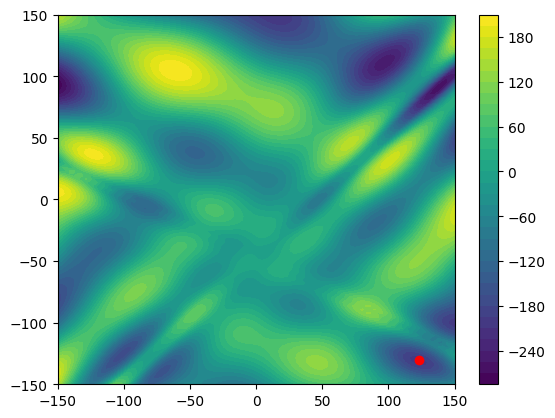

In [71]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_shgo[0], minimum_shgo[1], c='r')

In [72]:
# `optimize.dual_annealing` metodu ile küresel minimum `minimum_dual` hesaplayın
result_dual = optimize.dual_annealing(g, bounds)
minimum_dual = result_dual.x
minimum_dual

array([-150.       ,   93.4064749])

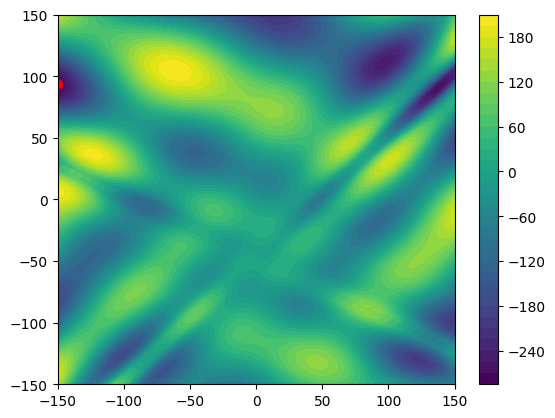

In [73]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_dual[0], minimum_dual[1], c='r')

**🧪Kodunuzu kontrol edin!**

In [74]:
from nbresult import ChallengeResult

result = ChallengeResult('global_optimization',
    bounds=bounds,
    Xmin_shgo=minimum_shgo,
    Xmin_dual=minimum_dual
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.5.0 -- /home/gokce/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/gokce/projects/data-scipy/tests
plugins: typeguard-4.4.2, dash-3.4.0, anyio-4.8.0
collecting ... collected 5 items

test_global_optimization.py::TestGlobalOptimization::test_bounds_values PASSED [ 20%]
test_global_optimization.py::TestGlobalOptimization::test_minimum_dual_shape PASSED [ 40%]
test_global_optimization.py::TestGlobalOptimization::test_minimum_dual_values PASSED [ 60%]
test_global_optimization.py::TestGlobalOptimization::test_minimum_shgo_shape PASSED [ 80%]
test_global_optimization.py::TestGlobalOptimization::test_minimum_shgo_values PASSED [100%]

============================== 5 passed in 0.34s ===============================


💯 You can commit your code:

git add tests/global_optimization.pickle

git commit -m 'Completed global

## (3) Yaklaşımlar

### (3.1) Saçılım Grafiğini Uydurmak

🧑🏻‍🏫 İki nicel değişken X ve Y arasındaki ilişkiyi analiz etmenin ilk adımı onları **saçılım grafiği** olarak göstermektir.

🤔 Ardından soru şu olur: X ve Y arasında hangi ilişki var? Saçılım grafiğini düz bir çizgiyle uydurabiliriz? Hayırsa, X ve Y arasındaki ilişkiyi bir polinom eğrisi mi? logaritmik eğri mi? ile yaklaşıklaştırabiliriz?

Çoğunlukla saçılım grafiğini düz bir çizgiyle uydurmamız gerekir, ancak bunun polinom, logaritmik vb. gibi başka şeyler de olabileceği durumlar vardır.

❓ Aşağıdaki veri seti için doğrusal regresyon eğrisi uydurmayı deneyer misiniz? ❓

In [ ]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

👉 Bu durumda, **2. derece polinom tahmincisi** ( $ Y = a X^2 + b X + c) $ basit bir düz çizgiden (1. derece polinom tahmincisi: $ Y = a X + b $) daha uygun görülmektedir.

❓ $ \large (a,b,c) $ parametreleriyle $\large f$ fonksiyonunu 2. dereceden tanımlayın ❓

In [75]:
# YOUR CODE HERE
def f(x, a, b, c):
    return a*x**2 + b*x + c

🎯 Bu saçılım grafiğini yaklaşıklaştırmak için 2. derece polinom fonksiyonunu kullanacağız. Bu nedenle **en iyi parametreleri $(a,b,c)$ bulmanız** gerekiyor.

❌ `optimize.minimize` metodunu tekrar kullanarak tahmincimiz $f$ ile saçılım grafiğimiz arasındaki Ortalama Karesel Hataları minimize etmek isteyebilirdik ama...

✅ Neyse ki, [`optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) bu optimizasyon sürecini sadece bir satır kod ile bizim için yapıyor!

In [78]:
# Deneyin
optimize.curve_fit(f, x, y)

(array([ 2.95156611e-11,  1.00000000e+00, -5.80763878e-08]),
 array([[ 2.90331522e-24, -1.68726754e-38, -2.68184816e-54],
        [-1.68726754e-38,  9.28796908e-20,  1.47628768e-35],
        [-2.68184816e-54,  1.47628768e-35,  1.86103470e-15]]))

* İlk dizi, $f$ ve veri seti arasındaki karesel hataları minimize etmek için hesaplanan $(a,b,c)$ katsayılarını içerir.

❓ Uyduğunu kontrol etmek için ikinci derece tahmincisini saçılım grafiğinin üzerine çizin! ❓

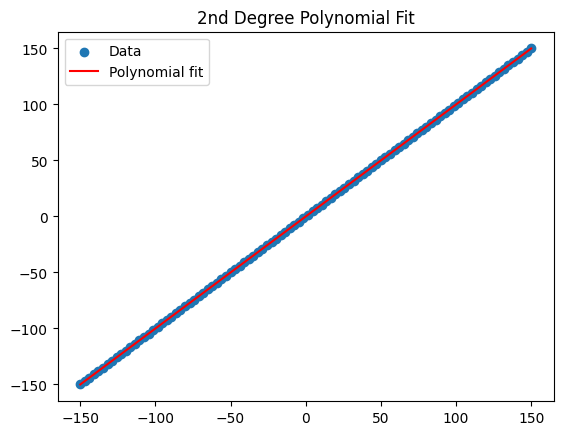

In [79]:
pass  # YOUR CODE HERE
plt.scatter(x, y, label="Data")

x_smooth = np.linspace(min(x), max(x), 200)
plt.plot(x_smooth, f(x_smooth, *params), color='r', label="Polynomial fit")

plt.legend()
plt.title("2nd Degree Polynomial Fit")
plt.show()

## (3.2) Enterpolasyon

🚀 Herhangi bir spreadsheet yazılımında olduğu gibi, genellikle bir dizi veri noktasındaki boşlukları hızlı bir şekilde doldurmak isteriz. [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) kullanacağız

In [80]:
from scipy import interpolate

👇 Aşağıdaki saçılım grafiğini düşünün:

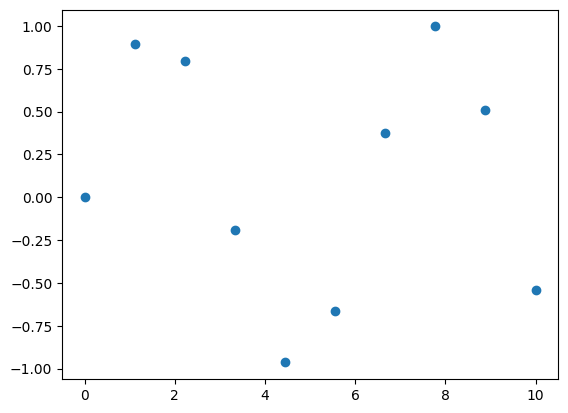

In [81]:
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

💡 Bu aralıktaki herhangi bir $x$ değerinin görüntüsünü hesaplayan sürekli bir fonksiyon oluşturmak için [`interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) metodunu kullanabiliriz

In [82]:
f_interpolated = interpolate.interp1d(x,y, kind='linear')
f_interpolated

❓ Şimdi, bu aralıktaki $x$ için herhangi bir sürekli değerle enterpolasyonlanmış fonksiyonunuzu çağırabilirsiniz. Yeni bir çizim ve yoğun bir `linspace` ile $x$ için görselleştirin. `quadratic` veya `cubic` gibi diğer `kind` enterpolasyonlarını denemekten çekinmeyin ❓

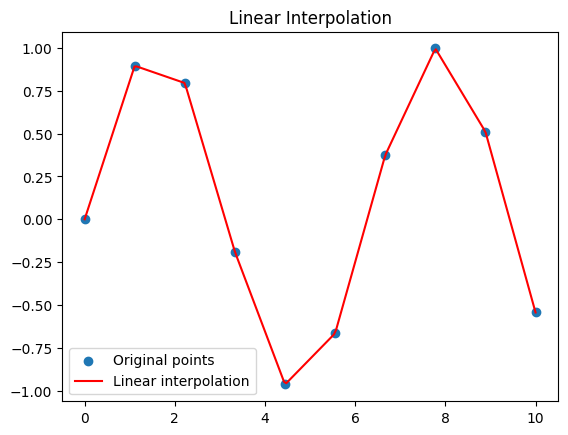

In [84]:
# YOUR CODE HERE
x_dense = np.linspace(0, 10, 200)

plt.scatter(x, y, label="Original points")
plt.plot(x_dense, f_interpolated(x_dense), color='r', label="Linear interpolation")

plt.legend()
plt.title("Linear Interpolation")
plt.show()

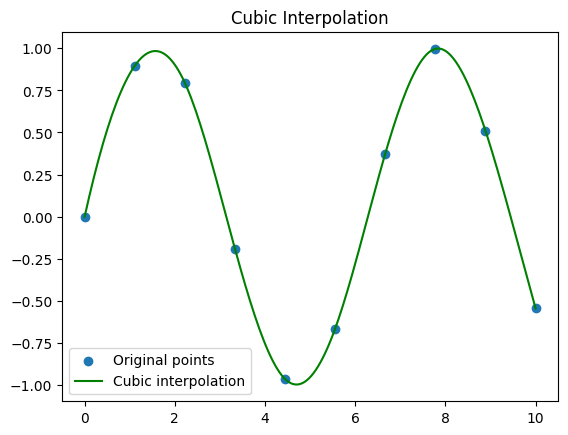

In [85]:
f_cubic = interpolate.interp1d(x, y, kind='cubic')

plt.scatter(x, y, label="Original points")
plt.plot(x_dense, f_cubic(x_dense), color='g', label="Cubic interpolation")

plt.legend()
plt.title("Cubic Interpolation")
plt.show()